In [1]:
import os
%matplotlib inline 
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import cv2

Using TensorFlow backend.


In [2]:
# run params
SECTION = 'mlz'
DATA_NAME = 'weights'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += DATA_NAME

#mode =  'build' # 'build' # 
mode = ''

IMAGE_SIZE = 128

data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

In [3]:
gan_base_diff = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )
gan_base_diff.load_weights(os.path.join(RUN_FOLDER, 'base_diff/weights-below-6.h5'))

In [4]:
gan_diff_specular = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )
gan_diff_specular.load_weights(os.path.join(RUN_FOLDER, 'diff_spec/weights-below-8.h5'))

In [56]:
base_img = data_loader.load_img('data/final/base.jpg')
diff_img = data_loader.load_img('data/final/diff.jpg')
real_spec_img = data_loader.load_img('data/final/diff_specular.jpg')
fake_diff = gan_base_diff.g_BA.predict(base_img)
fake_spec = gan_diff_specular.g_BA.predict(fake_diff)
#fake_spec = gan_diff_specular.g_BA.predict(diff_img)

In [67]:
# Save the generated images
gen_imgs = np.concatenate([base_img, fake_diff, diff_img, fake_spec, real_spec_img])

r, c = 1, 5
# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
gen_imgs = np.clip(gen_imgs, 0, 1)

titles = ['Base', 'Fake Diff', 'Real Diff', 'Fake PBR', 'Real PBR']
fig, axs = plt.subplots(r, c, figsize=(25,6))
cnt = 0
for j in range(c):
    axs[j].imshow(gen_imgs[cnt])
    axs[j].set_title(titles[j])
    axs[j].axis('off')
    cnt += 1
fig.savefig("result.png")
plt.close()


In [71]:
real_pbr_np = np.array(real_spec_img)
fake_pbr_np = np.array(fake_spec)
mse = ((real_pbr_np - fake_pbr_np)**2).mean(axis=None)
print(mse)

0.02127417780697656


In [70]:
# MSE btw real diff and pbr
real_pbr_np = np.array(real_spec_img)
real_diff_np = np.array(diff_img)
mse = ((real_pbr_np - real_diff_np)**2).mean(axis=None)
print("MSE btw real diff and pbr")
print(mse)

MSE btw real diff and pbr
0.0029296211693419193


In [73]:
# MSE btw real diff and fake diff
real_diff_np = np.array(diff_img)
fake_diff_np = np.array(fake_diff)
mse = ((real_diff_np - fake_diff_np)**2).mean(axis=None)
print("MSE btw real diff and fake diff")
print(mse)

MSE btw real diff and fake diff
0.030096739617897272


In [68]:
# MSE btw base and real diff
diff_np = np.array(diff_img)
base_np = np.array(base_img)
mse = ((diff_np - base_np)**2).mean(axis=None)
print("MSE btw base and real diff")
print(mse)

MSE btw base and real diff
0.07900343567778419


In [69]:
# MSE btw base and fake diff
fake_diff_np = np.array(fake_diff)
base_np = np.array(base_img)
mse = ((fake_diff_np - base_np)**2).mean(axis=None)
print("MSE btw base and fake diff")
print(mse)

MSE btw base and fake diff
0.01947023363940763


In [72]:
# MSE btw fake diff and fake PBR
fake_spec_np = np.array(fake_spec)
fake_diff_np = np.array(fake_diff)
mse = ((fake_spec_np - fake_diff_np)**2).mean(axis=None)
print("MSE btw fake diff and fake spec")
print(mse)

MSE btw fake diff and fake spec
0.0013026507


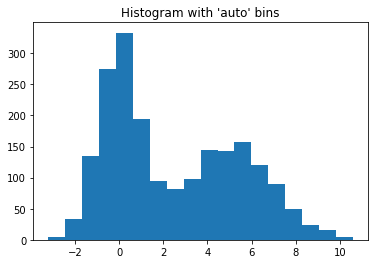

In [14]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

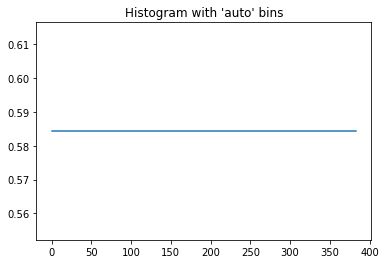

In [77]:
base_img = data_loader.load_img('data/final/base.jpg')
diff_img = data_loader.load_img('data/final/diff.jpg')
real_spec_img = data_loader.load_img('data/final/diff_specular.jpg')
fake_diff = gan_base_diff.g_BA.predict(base_img)
fake_spec = gan_diff_specular.g_BA.predict(fake_diff)
#fake_spec = gan_diff_specular.g_BA.predict(diff_img)

gen_imgs = np.concatenate([base_img, fake_diff, diff_img, fake_spec, real_spec_img])

gen_imgs = 0.5 * gen_imgs + 0.5
gen_imgs = np.clip(gen_imgs, 0, 1)
r_chan2 = gen_imgs[0, :, 0]
np_r_chan2 = np.array(r_chan2)
img2 = np_r_chan2.flatten()


plt.plot(img2)
plt.title("Histogram with 'auto' bins")
plt.show()

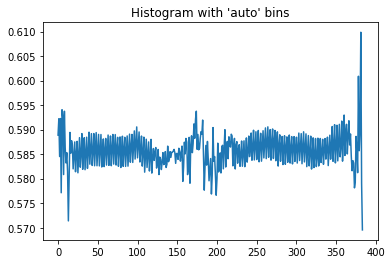

In [42]:
fakek2 = 0.5 * fake_spec + 0.5
fakek2 = np.clip(fakek2, 0, 1)
r_chan2 = fakek2[:, 0]
img2 = r_chan2.flatten()


plt.plot(img2)
plt.title("Histogram with 'auto' bins")
plt.show()